In [ ]:
Saan Similien
Final Project Figures 

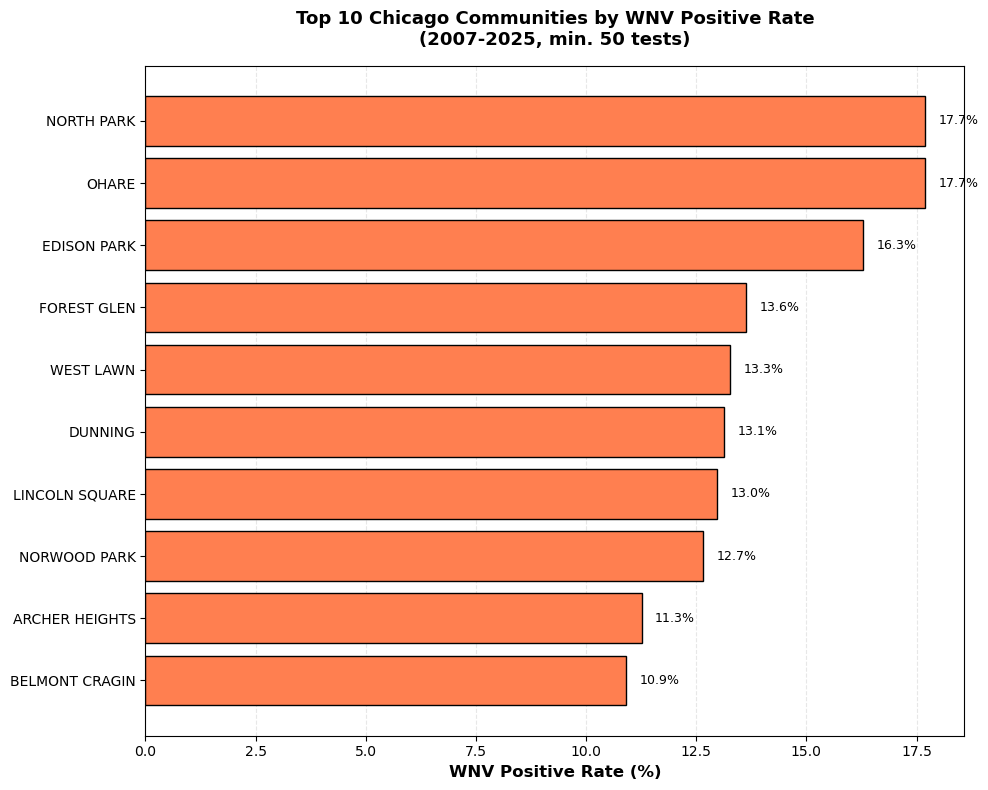

Top 10 High-Risk Communities:
     community  total_tests  positive_tests  positive_rate
    NORTH PARK          435              77      17.701149
         OHARE         4657             824      17.693794
   EDISON PARK          528              86      16.287879
   FOREST GLEN         1467             200      13.633265
     WEST LAWN          452              60      13.274336
       DUNNING         1409             185      13.129879
LINCOLN SQUARE          971             126      12.976313
  NORWOOD PARK          561              71      12.655971
ARCHER HEIGHTS          657              74      11.263318
BELMONT CRAGIN          788              86      10.913706


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data 
df = pd.read_csv('mosquito_trap_results.csv')

#filter the data to get only test results and community names 
df_tested = df[df['RESULT'].notna() & df['COMMUNITY AREA NAME'].notna()]

#group them by the community they're part of 
community_stats = df_tested.groupby('COMMUNITY AREA NAME').agg({
    'RESULT': ['count', lambda x: (x == 'positive').sum()]
}).reset_index()

community_stats.columns = ['community', 'total_tests', 'positive_tests']
community_stats['positive_rate'] = (community_stats['positive_tests'] / community_stats['total_tests']) * 100

#filter data to get onlt communities with at least 50 tests
community_stats = community_stats[community_stats['total_tests'] >= 50]

#get the top 10 communities in risk 
top_10 = community_stats.nlargest(10, 'positive_rate').sort_values('positive_rate')

#figure 
fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.barh(range(len(top_10)), top_10['positive_rate'], color='coral', edgecolor='black')

#titles and labels for the figure 
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['community'])
ax.set_xlabel('WNV Positive Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Chicago Communities by WNV Positive Rate\n(2007-2025, min. 50 tests)', 
             fontsize=13, fontweight='bold', pad=15)

#put values to bars 
for i, (rate, tests) in enumerate(zip(top_10['positive_rate'], top_10['total_tests'])):
    ax.text(rate + 0.3, i, f'{rate:.1f}%', va='center', fontsize=9)

#clean it up 
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('top_communities_wnv.png', dpi=300, bbox_inches='tight')
plt.show()

#summary of the data on the figure 
print("Top 10 High-Risk Communities:")
print(top_10[['community', 'total_tests', 'positive_tests', 'positive_rate']].sort_values('positive_rate', ascending=False).to_string(index=False))

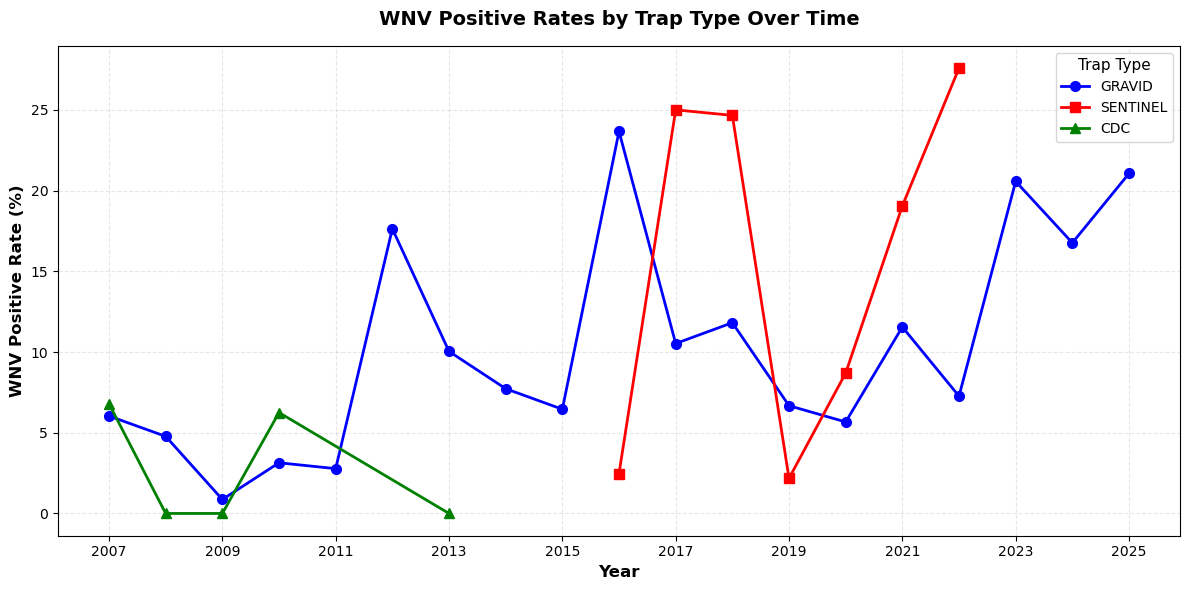


Overall Trap Type Statistics (2007-2025):
trap_type  total_tests  positive_tests  positive_rate
      CDC         1256              79       6.289809
   GRAVID        36586            3573       9.766031
 SENTINEL          372              56      15.053763


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#load the data 
df = pd.read_csv('mosquito_trap_results.csv')

#filter for only tested data
df_tested = df[df['RESULT'].notna() & df['TRAP_TYPE'].notna()]

#put data into groups of trap type and the year 
trap_year = df_tested.groupby(['SEASON YEAR', 'TRAP_TYPE']).agg({
    'RESULT': ['count', lambda x: (x == 'positive').sum()]
}).reset_index()

trap_year.columns = ['year', 'trap_type', 'total', 'positive']
trap_year['positive_rate'] = (trap_year['positive'] / trap_year['total']) * 100

#filter out all the rare traps, keep common ones  
main_traps = ['GRAVID', 'SENTINEL', 'CDC']
trap_year = trap_year[trap_year['trap_type'].isin(main_traps)]

#figure
fig, ax = plt.subplots(figsize=(12, 6))

#plot the trap types 
colors = {'GRAVID': 'blue', 'SENTINEL': 'red', 'CDC': 'green'}
markers = {'GRAVID': 'o', 'SENTINEL': 's', 'CDC': '^'}

for trap in main_traps:
    data = trap_year[trap_year['trap_type'] == trap]
    ax.plot(data['year'], data['positive_rate'], 
            color=colors[trap], marker=markers[trap], 
            linewidth=2, markersize=7, label=trap)

#customize the figure 
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('WNV Positive Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('WNV Positive Rates by Trap Type Over Time', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(title='Trap Type', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

#x-axis only shows every other year 
ax.set_xticks(range(2007, 2026, 2))

plt.tight_layout()
plt.savefig('trap_types_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

#summary of data on the figure 
print("\nOverall Trap Type Statistics (2007-2025):")
overall = df_tested[df_tested['TRAP_TYPE'].isin(main_traps)].groupby('TRAP_TYPE').agg({
    'RESULT': ['count', lambda x: (x == 'positive').sum()]
}).reset_index()
overall.columns = ['trap_type', 'total_tests', 'positive_tests']
overall['positive_rate'] = (overall['positive_tests'] / overall['total_tests']) * 100
print(overall.to_string(index=False))